In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pydmd 
import plotly.graph_objects as go


In [4]:
df = pd.DataFrame()
matx = pd.read_csv("DATA/nse500i.csv",header=None)
matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

# Get the last 20 columns of the DataFrame
mat = matx.iloc[:, -17:-10]

In [ ]:
super_df = pd.DataFrame()
matx = pd.read_csv("DATA/nse500i.csv",header=None)
# matx = pd.DataFrame(matx.transpose())
matx = matx.fillna(0)

for j in range(10,375,10) :
    df = []
    for i in range(3,25,2) :
        
        
        # Get the last 20 columns of the DataFrame
        mat = matx.iloc[:, -(j+i):-j]
        mat = mat.to_numpy()
        # Create a DMD object and fit it to the data
        mat = mat.astype(float)
        dmd = pydmd.DMD()

        dmd.fit(mat)

        cp = matx.iloc[:,-(j-1)]
        pred = dmd.predict(mat)
        p=pred[:,-1]
        # err = cp - pred[:,-1]
        df.append(cp[0] - np.real(p[0])) 
    print(df)
    super_df = pd.concat([super_df, pd.Series(df)], axis=1,)

ls =  list(range(10,18) )
ls = [str(i) for i in ls]
super_df.columns = ls

super_df    

[-721.0748622825366, -951.4185592886458, -639.3530473913103, -667.8526170948855, -807.4048982304537, -720.0148100651288, -709.2933820206647, -548.1563400601466, -519.6839483346407, -514.7467616138978, -260.22958391016147, -167.04830762661544, 43.95391410819407, 1597.390541116983, 1751.1418350885021, 1676.545822576594, 1683.2472459352348, 2341.555911500716, 1441.1727921392414, 2605.7162214377563, 2680.442141353011, 2474.1645815086354, 2421.2932344508863, 2491.2390914393345, 2236.994279390251, 2272.296929216688, 2264.648959070267, 1206.5511216829661, 2114.838207061722, 2160.362746489856, 2717.788796659001, 2713.5330687733476, 2613.595330138066, 2603.61462070177, 1350.9356948567395, 664.1895391819158, 793.8746378167192, 1365.6956720900018, 1370.9727192578227, 1220.054942329568, 1485.1589147791733, 1448.6902939890604, 535.9632324496614, 711.6050340946504, 728.4514279653046, 522.109712560511, 538.3287248210657, 501.0339384586023, 221.12503773264427, 309.0024888597077, 877.3042219881038, 927

,10,11,12,13,14,15,16,17
0,-721.074862,252.310055,-239.302271,89.244514,52.736565,97.752846,22.811702,353.080373
1,-951.418559,241.289717,31.890569,26.429906,73.994696,69.517363,37.549858,343.046419
2,-639.353047,190.247668,-16.695622,13.014797,67.740760,109.903554,31.765128,342.600798
3,-667.852617,144.961633,35.667912,18.408258,55.372690,116.700484,31.456506,333.252840
4,-807.404898,160.548663,40.962425,80.334122,41.746299,55.098588,32.203318,325.039555
...,...,...,...,...,...,...,...,...
67,540.189805,-1.514780,408.643780,170.854152,-297.514469,-193.657309,-413.491680,-2312.003421
68,523.916345,-11.941866,409.062166,193.293579,-220.379902,-196.018790,-485.924286,-2632.443355
69,400.227406,-11.125887,309.030077,23.089465,-180.991239,-53.077975,-300.834573,-2192.320806
70,380.869799,-11.250021,28.197008,43.088247,-209.982044,-187.930129,-202.282541,-1517.426933


In [ ]:
pos_super_df = np.abs(super_df)
pos_super_df.to_csv("explore_500.csv")

In [ ]:
mat = mat.to_numpy()

In [ ]:
# Create a DMD object and fit it to the data
mat = mat.astype(float)

dmd = pydmd.DMD()

dmd.fit(mat)



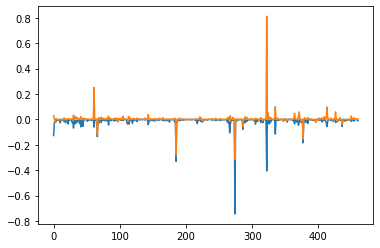

In [ ]:

# Print the DMD modes and frequencies
plt.plot(dmd.modes)


In [ ]:
cp = matx.iloc[:,-9]
cp

0      15615.150390
1       3262.350098
2       2484.949951
3       2716.449951
4       1098.300049
           ...     
456      238.949997
457       16.549999
458      264.399994
459        7.100000
460     1340.250000
Name: 1452, Length: 461, dtype: float64

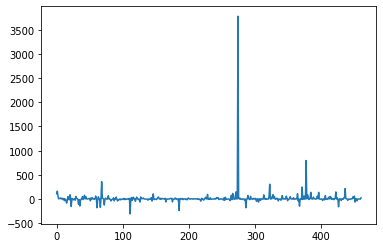

In [ ]:
pred = dmd.predict(mat)
p=pred[:,-1]
err = cp - pred[:,-1]

plt.plot(err)

In [ ]:
print("Actua:",cp[0] , "\n Pred :" , np.real(p[0]) , "\n error :" ,cp[0] - np.real(p[0])) 

Actua: 15615.15039 
 Pred : 15506.894427771103 
 error : 108.25596222889726


In [ ]:
(145/18202)*100

0.7966157565102735

In [ ]:
x = list(range(1,976,1))


In [ ]:
def rmse(y_actual,y_pred):
    return np.sqrt(np.mean((y_actual-y_pred)**2))


In [ ]:
rmse(cp,p)

186.4100342099351

In [ ]:
# create a line plot
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=np.real(cp), mode='lines', name='Actual'))
fig.add_trace(go.Scatter(x=x, y=np.real(p), mode='lines', name='Predicted'))

# enable hover-over tooltips
fig.update_layout(hovermode='x')

# show the plot
fig.show()
